# Women, Business & Law
Measuring gender equality globally

WBL 2020 is the sixth in the series of biannual reports measuring gender differences in the law. In 2019 a study was released which piloted a new index that aggregates 35 data points across 8 scored indicators. The WBL index scores are based on the average of each economy’s scores for the 8 topics included in this year’s aggregate score. A higher score indicates more gender equal laws. The dataset was expanded in 2020 to include historical information dating back to 1970. This file contains Women, Business and the Law (WBL) data for 190 economies for 1970 to 2019 (reporting years 1971 to 2020). 

For more information about the methodology for data collection, scoring and analysis, visit http://wbl.worldbank.org.

# Setup

In [ ]:
# install needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textwrap import fill

In [2]:
# load data using pandas
wbl_data = pd.read_excel("wbl_data_50yearpanel_web_27feb2020.xlsx")

In [3]:
#show head and tail to make sure data is formatted correctly (no add'l headers/total lines)
wbl_data.head()

,ID,Economy,Code,Region,Income group,WBL Report Year,WBL INDEX,MOBILITY,Fam_CM_Passport,Fam_CM_TravelAbroad,...,Fam_AM_RightsImmovables,Fam_AM_InheritanceChildren,Fam_AM_InheritanceSpouses,Fam_AM_PropertyAdministration_formula,Fam_AM_NonmonetaryContributions,PENSION,Ages full benefits scored,Ages partial benefits scored,Ages mandatory retirement scored,Pension care credit
0,AFG1971,Afghanistan,AFG,South Asia,Low income,1971,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
1,AFG1972,Afghanistan,AFG,South Asia,Low income,1972,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
2,AFG1973,Afghanistan,AFG,South Asia,Low income,1973,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
3,AFG1974,Afghanistan,AFG,South Asia,Low income,1974,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
4,AFG1975,Afghanistan,AFG,South Asia,Low income,1975,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No


In [4]:
wbl_data.tail()

,ID,Economy,Code,Region,Income group,WBL Report Year,WBL INDEX,MOBILITY,Fam_CM_Passport,Fam_CM_TravelAbroad,...,Fam_AM_RightsImmovables,Fam_AM_InheritanceChildren,Fam_AM_InheritanceSpouses,Fam_AM_PropertyAdministration_formula,Fam_AM_NonmonetaryContributions,PENSION,Ages full benefits scored,Ages partial benefits scored,Ages mandatory retirement scored,Pension care credit
9495,ZWE2016,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2016,86.9,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,100,Yes,Yes,Yes,Yes
9496,ZWE2017,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2017,86.9,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,100,Yes,Yes,Yes,Yes
9497,ZWE2018,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2018,86.9,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,100,Yes,Yes,Yes,Yes
9498,ZWE2019,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2019,86.9,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,100,Yes,Yes,Yes,Yes
9499,ZWE2020,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2020,86.9,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,100,Yes,Yes,Yes,Yes


In [5]:
#describe quantitative variables to understand distribution of values
wbl_data.describe()

,WBL Report Year,WBL INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
count,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,1995.500000,59.126326,82.044737,40.944737,46.186842,61.810526,33.932632,72.010526,75.067368,60.889474
std,14.431629,18.058837,25.891629,32.477038,30.896172,29.475642,30.051149,20.924141,27.766750,29.110644
min,1971.000000,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1983.000000,46.900000,75.000000,25.000000,25.000000,40.000000,0.000000,75.000000,60.000000,25.000000
50%,1995.500000,58.800000,100.000000,25.000000,50.000000,80.000000,20.000000,75.000000,80.000000,75.000000
75%,2008.000000,71.300000,100.000000,50.000000,75.000000,80.000000,60.000000,75.000000,100.000000,75.000000
max,2020.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# WBL by Income Group

In [6]:
#duplicate dataset
data = wbl_data

#create new average WBL score by income group & year (realized later this is not necessary)
data["WBL Avg Year"] = data.groupby('WBL Report Year')['WBL INDEX'].transform(np.mean)
data["WBL Avg Year_group"] = data.groupby(['WBL Report Year','Income group'])['WBL INDEX'].transform(np.mean)
data.head()

,ID,Economy,Code,Region,Income group,WBL Report Year,WBL INDEX,MOBILITY,Fam_CM_Passport,Fam_CM_TravelAbroad,...,Fam_AM_InheritanceSpouses,Fam_AM_PropertyAdministration_formula,Fam_AM_NonmonetaryContributions,PENSION,Ages full benefits scored,Ages partial benefits scored,Ages mandatory retirement scored,Pension care credit,WBL Avg Year,WBL Avg Year_group
0,AFG1971,Afghanistan,AFG,South Asia,Low income,1971,26.3,25,No,Yes,...,No,Yes,No,25,No,No,Yes,No,46.401579,39.223333
1,AFG1972,Afghanistan,AFG,South Asia,Low income,1972,26.3,25,No,Yes,...,No,Yes,No,25,No,No,Yes,No,46.517895,39.203333
2,AFG1973,Afghanistan,AFG,South Asia,Low income,1973,26.3,25,No,Yes,...,No,Yes,No,25,No,No,Yes,No,47.050526,39.370000
3,AFG1974,Afghanistan,AFG,South Asia,Low income,1974,26.3,25,No,Yes,...,No,Yes,No,25,No,No,Yes,No,47.933158,41.123333
4,AFG1975,Afghanistan,AFG,South Asia,Low income,1975,26.3,25,No,Yes,...,No,Yes,No,25,No,No,Yes,No,48.301053,41.206667


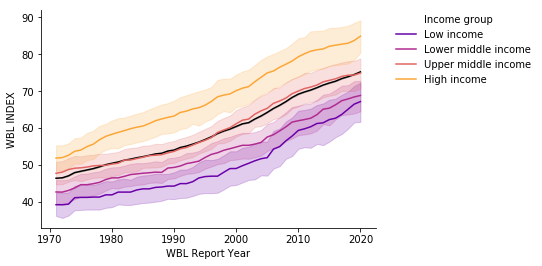

In [8]:
#plot WBL by income group with global WBL average
sns.set_palette("plasma", 4)
sns.lineplot(x='WBL Report Year',y='WBL Avg Year',  color='black', data=data)
sns.lineplot(x='WBL Report Year',y='WBL INDEX',  hue = 'Income group', data=data)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

#note that low income countries are almost equatable to lower middle income countries by 2020

In [9]:
#index data to plot variance between income group average & global average

data["WBL_diff"] = data["WBL INDEX"] - data['WBL Avg Year']
data.head()

,ID,Economy,Code,Region,Income group,WBL Report Year,WBL INDEX,MOBILITY,Fam_CM_Passport,Fam_CM_TravelAbroad,...,Fam_AM_PropertyAdministration_formula,Fam_AM_NonmonetaryContributions,PENSION,Ages full benefits scored,Ages partial benefits scored,Ages mandatory retirement scored,Pension care credit,WBL Avg Year,WBL Avg Year_group,WBL_diff
0,AFG1971,Afghanistan,AFG,South Asia,Low income,1971,26.3,25,No,Yes,...,Yes,No,25,No,No,Yes,No,46.401579,39.223333,-20.101579
1,AFG1972,Afghanistan,AFG,South Asia,Low income,1972,26.3,25,No,Yes,...,Yes,No,25,No,No,Yes,No,46.517895,39.203333,-20.217895
2,AFG1973,Afghanistan,AFG,South Asia,Low income,1973,26.3,25,No,Yes,...,Yes,No,25,No,No,Yes,No,47.050526,39.370000,-20.750526
3,AFG1974,Afghanistan,AFG,South Asia,Low income,1974,26.3,25,No,Yes,...,Yes,No,25,No,No,Yes,No,47.933158,41.123333,-21.633158
4,AFG1975,Afghanistan,AFG,South Asia,Low income,1975,26.3,25,No,Yes,...,Yes,No,25,No,No,Yes,No,48.301053,41.206667,-22.001053


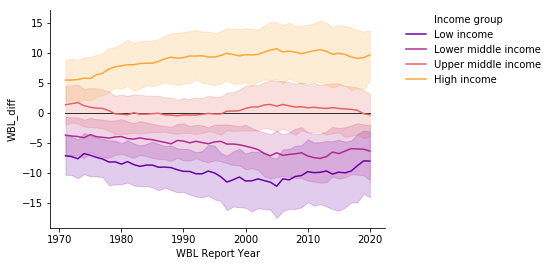

In [11]:
#plot average by income group overtime compared to global average
sns.lineplot(x=data['WBL Report Year'], y=0, color="black", size=0.5, legend=False)
sns.lineplot(x='WBL Report Year',y='WBL_diff',  hue = 'Income group', data=data)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

# WBL by Region

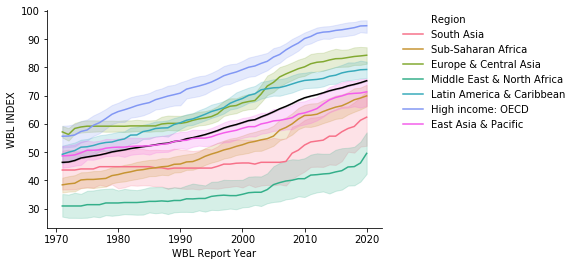

In [13]:
#duplicate original dataset again
data2 = wbl_data

#plot WBL average by region with global average
sns.lineplot(x='WBL Report Year',y='WBL Avg Year',  color='black',data=data2)
sns.lineplot(x='WBL Report Year',y='WBL INDEX',  hue = 'Region', data=data2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

#note: growth in recent years has accelerated across several regions (primarily Europe, South Asia)

# WBL by Topic

Text(0.5,1,'WBL Score by Topic')

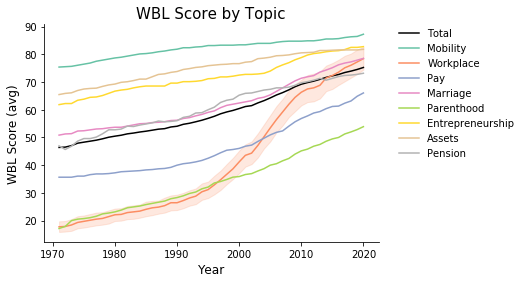

In [17]:
#plot WBL score by WBL component / topic that aggregates to the total score. 
#I am trying to identify primary drivers for the growth acceleration in reacent years.

#since each topic score is a different variable, I have to plot multiple 'y' variables on the same plot

#set new color palette to differentiate 8 lines more easily
sns.set_palette("Set2",8)

sns.lineplot(x='WBL Report Year',y='WBL INDEX', data=data2, color="black", ci=None)
sns.lineplot(x='WBL Report Year',y='MOBILITY', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='WORKPLACE', data=data2)
sns.lineplot(x='WBL Report Year',y='PAY', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='MARRIAGE', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='PARENTHOOD', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='ENTREPRENEURSHIP', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='ASSETS', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='PENSION', data=data2, ci=None)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, 
           labels=['Total','Mobility','Workplace','Pay','Marriage','Parenthood','Entrepreneurship','Assets','Pension'])
plt.xlabel("Year", fontsize= 12)
plt.ylabel("WBL Score (avg)", fontsize= 12)
plt.title("WBL Score by Topic", fontsize= 15)

#note: while all topics are trending positive, 'workplace' has been growing at a faster rate since late-90's
#I kept the confidence interval on this topic to provide insight on distribution and as a highlight

# Workplace by Income Group

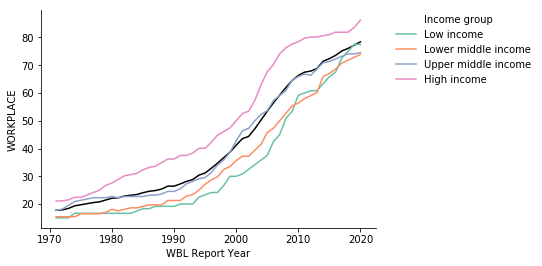

In [18]:
#try to understand what is driving accelerated Workplace score - starting w/ splicing by income group

sns.lineplot(x='WBL Report Year',y='WORKPLACE',  color='black',data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='WORKPLACE',  hue = 'Income group', data=data2, ci=None)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

#workplace is behaving similarly across income groups, although high income countries had a steeper acceleration earlier on

# Workplace by Region

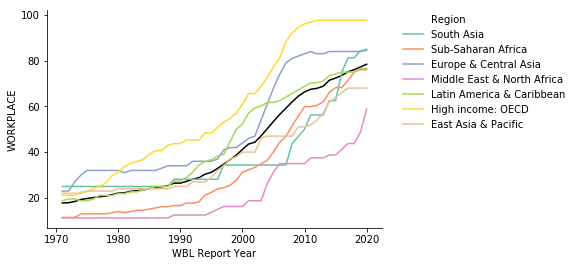

In [19]:
#splice workplace score by region

sns.lineplot(x='WBL Report Year',y='WORKPLACE',  color='black',data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='WORKPLACE',  hue = 'Region', data=data2, ci=None)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

#note: OECD and European regions pioneered taking significant measures to improve workplace culture
#while there has been growth in the Middle East, there is still room for improvement

# Break Down Workplace into its Attributes
I still cannot answer "why" workplace is improving so I am going to plot the results to questions that feed this metric.

Text(0.5,1,'Workplace-Related Attributes')

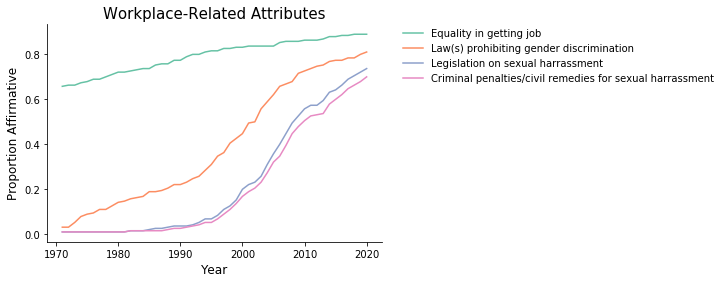

In [20]:
#convert yes/no questions into boolean data
data2['GetJob_bool'] = np.where(data2['Fam_CM_GetJob'] == "Yes", 1,0)
data2['NonDiscrim_bool'] = np.where(data2['NonDiscrim in Employment'] == "Yes", 1,0)
data2['SexHar_bool'] = np.where(data2['WBL_dv_Law- SexHarWorkPlace'] == "Yes", 1,0)
data2['SexHarCrime_bool'] = np.where(data2['WBL_dv_Law- SexHarWorkPlaceCrimPenCivRem'] == "Yes", 1,0)

sns.lineplot(x='WBL Report Year',y='GetJob_bool', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='NonDiscrim_bool', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='SexHar_bool', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='SexHarCrime_bool', data=data2, ci=None)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, 
           labels=['Equality in getting job','Law(s) prohibiting gender discrimination','Legislation on sexual harrassment','Criminal penalties/civil remedies for sexual harrassment'])
plt.xlabel("Year", fontsize= 12)
plt.ylabel("Proportion Affirmative", fontsize= 12)
plt.title("Workplace-Related Attributes", fontsize= 15)
 

# Break Down Parenthood into its Attributes
Parenthood is the lowest performing topic. Let's look into it to see which question can be improved globally

Text(0.5,1,'Parenthood-Related Attributes')

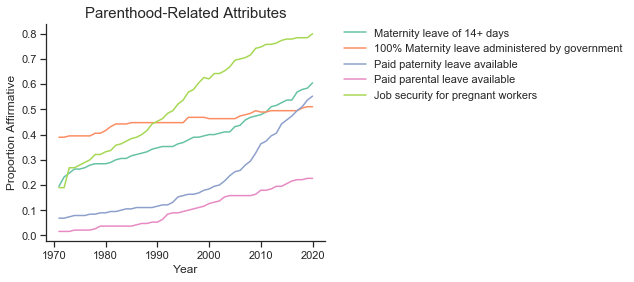

In [55]:
#convert yes/no questions into boolean data
data2['MaternityLeave_bool'] = np.where(data2['Leave women days scored'] == "Yes", 1,0)
data2['MaternityGov_bool'] = np.where(data2['Maternity benefits scored'] == "Yes", 1,0)
data2['PaternityLeave_bool'] = np.where(data2['Paternity scored'] == "Yes", 1,0)
data2['ParentalLeave_bool'] = np.where(data2['Parental scored'] == "Yes", 1,0)
data2['JobSecurity_bool'] = np.where(data2['Dismissal Pregnant Women'] == "Yes", 1,0)

sns.set_palette("Set2",5)
sns.lineplot(x='WBL Report Year',y='MaternityLeave_bool', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='MaternityGov_bool', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='PaternityLeave_bool', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='ParentalLeave_bool', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='JobSecurity_bool', data=data2, ci=None)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, 
           labels=['Maternity leave of 14+ days','100% maternity leave administered by government','Paid paternity leave available','Paid parental leave available','Job security for pregnant workers'])
plt.xlabel("Year", fontsize= 12)
plt.ylabel("Proportion Affirmative", fontsize= 12)
plt.title("Parenthood-Related Attributes", fontsize= 15)

# Takeaway
Increased sexual harrassment-related legislation in recent years is driving WBL acceleration globally. This conclusion makes sense, as we are seeing more people break silence on sexual harrassment/violence in personal and professional settings. With the #MeToo movement beginning in 2006 by a sexual harrassment survivor, individuals like Harvey Weinstein, Roger Ailes, Bill Cosby, Matt Lauer, Larry Nasser, etc. have been accused of and some charged with some form of sexual misconduct. 

Litigation changes with society. As more misconduct cases come to light, it is important that the legal system is ready to address them appropriately around the world.

# Saving Figures for Presentation View

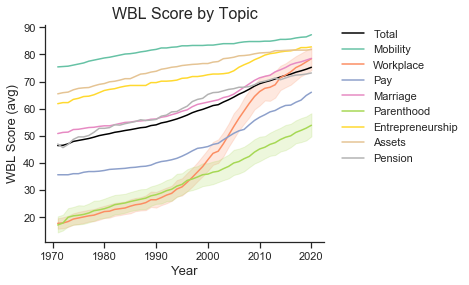

In [56]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("ticks")
sns.set_palette("Set2",8)

sns.lineplot(x='WBL Report Year',y='WBL INDEX', data=data2, color="black", ci=None)
sns.lineplot(x='WBL Report Year',y='MOBILITY', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='WORKPLACE', data=data2)
sns.lineplot(x='WBL Report Year',y='PAY', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='MARRIAGE', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='PARENTHOOD', data=data2)
sns.lineplot(x='WBL Report Year',y='ENTREPRENEURSHIP', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='ASSETS', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='PENSION', data=data2, ci=None)
sns.despine()
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, 
           labels=['Total','Mobility','Workplace','Pay','Marriage','Parenthood','Entrepreneurship','Assets','Pension'])
lgd
plt.xlabel("Year", fontsize= 13)
plt.ylabel("WBL Score (avg)", fontsize= 13)
plt.title("WBL Score by Topic", fontsize= 16)

plt.savefig(fname='WBL by Topic', bbox_extra_artists=(lgd,), bbox_inches='tight')

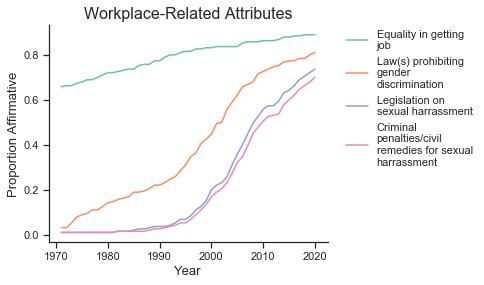

In [45]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("ticks")
sns.set_palette("Set2",4)

sns.lineplot(x='WBL Report Year',y='GetJob_bool', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='NonDiscrim_bool', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='SexHar_bool', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='SexHarCrime_bool', data=data2, ci=None)

sns.despine()
labels = ['Equality in getting job','Law(s) prohibiting gender discrimination','Legislation on sexual harrassment','Criminal penalties/civil remedies for sexual harrassment']
label_wrap = [fill(l, 20) for l in labels]
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, labels=label_wrap)
lgd
plt.xlabel("Year", fontsize= 13)
plt.ylabel("Proportion Affirmative", fontsize= 13)
plt.title("Workplace-Related Attributes", fontsize= 16)

plt.savefig(fname='Workplace by Attribute', bbox_extra_artists=(lgd,), bbox_inches='tight')

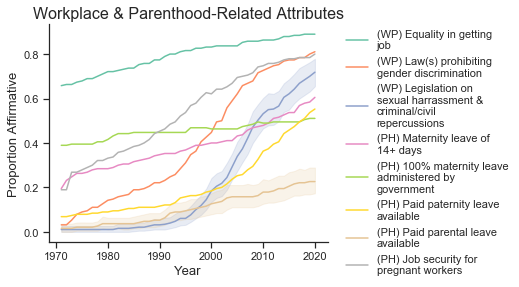

In [66]:
#put both workplace & parenthood on same plot

#combine both sexual harassment variables to reduce redundancy
data2['SexHarComb_bool'] = (data2['SexHar_bool']+data2['SexHarCrime_bool'])/2

sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("ticks")
sns.set_palette("Set2",9)

sns.lineplot(x='WBL Report Year',y='GetJob_bool', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='NonDiscrim_bool', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='SexHarComb_bool', data=data2)
sns.lineplot(x='WBL Report Year',y='MaternityLeave_bool', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='MaternityGov_bool', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='PaternityLeave_bool', data=data2, ci=None)
sns.lineplot(x='WBL Report Year',y='ParentalLeave_bool', data=data2)
sns.lineplot(x='WBL Report Year',y='JobSecurity_bool', data=data2, ci=None)

sns.despine()
labels = ['(WP) Equality in getting job','(WP) Law(s) prohibiting gender discrimination','(WP) Legislation on sexual harrassment & criminal/civil repercussions',
         '(PH) Maternity leave of 14+ days','(PH) 100% maternity leave administered by government','(PH) Paid paternity leave available','(PH) Paid parental leave available','(PH) Job security for pregnant workers']
label_wrap = [fill(l, 25) for l in labels]
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, labels=label_wrap)
lgd
plt.xlabel("Year", fontsize= 13)
plt.ylabel("Proportion Affirmative", fontsize= 13)
plt.title("Workplace & Parenthood-Related Attributes", fontsize= 16)

plt.savefig(fname='Workplace & Parenthood by Attribute', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [52]:
#calculate metrics to include on slide

print('Max WBL: ', data["WBL Avg Year"].max())
print('Min WBL: ', data["WBL Avg Year"].min())
print('WBL Growth: ',(data["WBL Avg Year"].max()-data["WBL Avg Year"].min())/data["WBL Avg Year"].min())

Max WBL:  75.24631578947357
Min WBL:  46.401578947368435
WBL Growth:  0.6216326576908651
